In [1]:
#pip install tenserflow --upgrade
pip install tensorflow --upgrade

ERROR: Could not find a version that satisfies the requirement tenserflow (from versions: none)
ERROR: No matching distribution found for tenserflow
Note: you may need to restart the kernel to use updated packages.


**We will be working with scikit-learn, which does not really need TensorFlow.
You don't need to install it for now.**

## Reading Uproot

In [1]:
import uproot
#import awkward
import numpy as np
import pandas as pd

**Here we specify only columns that we want, to reduce memory usage.
The original code would ask for 45 (!) columns of data, while using only 10 columns in BDT training.**

In [2]:
input_columns = ['mbb','nbjets','dEtabb','mj1','btagj1','qglikelihoodj1','mj2','btagj2','qglikelihoodj2','btagj3']
import_columns = input_columns + ["weight"]

### Signal Section

In [3]:
signal = uproot.open('ForML_SUSYGluGluToBBHToBB_M-300_2017.root')
signal

<ReadOnlyDirectory '/' at 0x7f1240099310>

In [4]:
signal_tree = signal['mssmhbb']
signal_tree

<TTree 'mssmhbb' (45 branches) at 0x7f1203492f70>

**To reduce even further memory consumption, we can declare columns to use, impose cut, and specify library to use right here.**

In [5]:
#signal_df = awkward.to_pandas(signal_b)
signal_df = signal_tree.arrays(input_columns, library="pd", cut="weight>0")
signal_df

,mbb,nbjets,dEtabb,mj1,btagj1,qglikelihoodj1,mj2,btagj2,qglikelihoodj2,btagj3
0,247.502716,3,0.481564,15.517390,0.887491,0.999479,16.113611,0.939928,0.703348,0.915599
3,149.893295,3,0.161677,9.632886,0.999974,0.069399,15.820998,0.006925,0.007535,0.995224
6,315.735199,2,0.358081,25.032156,0.157399,0.903754,20.700012,0.010202,0.014573,0.997033
7,286.116486,5,0.315241,14.416768,0.999981,0.947396,28.254524,0.932847,0.025025,0.800665
9,233.878204,4,0.288374,19.564425,0.549932,0.012586,15.799347,0.922862,0.009288,0.758133
...,...,...,...,...,...,...,...,...,...,...
1886561,232.293991,1,0.663890,11.275383,0.055933,0.985068,13.545302,0.955079,0.031266,0.021039
1886562,189.542206,1,0.491767,18.958754,0.136861,0.878480,8.465266,0.957051,0.995948,0.007203
1886565,177.349838,3,0.254090,19.264492,0.008957,0.081572,6.688364,0.206645,0.971596,0.996494
1886567,260.582703,4,0.119817,18.562035,0.979573,0.999715,12.421498,0.498276,0.789132,0.871037


In [6]:
signal_df['label'] = np.ones(len(signal_df))

In [7]:
signal_df

,mbb,nbjets,dEtabb,mj1,btagj1,qglikelihoodj1,mj2,btagj2,qglikelihoodj2,btagj3,label
0,247.502716,3,0.481564,15.517390,0.887491,0.999479,16.113611,0.939928,0.703348,0.915599,1.0
3,149.893295,3,0.161677,9.632886,0.999974,0.069399,15.820998,0.006925,0.007535,0.995224,1.0
6,315.735199,2,0.358081,25.032156,0.157399,0.903754,20.700012,0.010202,0.014573,0.997033,1.0
7,286.116486,5,0.315241,14.416768,0.999981,0.947396,28.254524,0.932847,0.025025,0.800665,1.0
9,233.878204,4,0.288374,19.564425,0.549932,0.012586,15.799347,0.922862,0.009288,0.758133,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1886561,232.293991,1,0.663890,11.275383,0.055933,0.985068,13.545302,0.955079,0.031266,0.021039,1.0
1886562,189.542206,1,0.491767,18.958754,0.136861,0.878480,8.465266,0.957051,0.995948,0.007203,1.0
1886565,177.349838,3,0.254090,19.264492,0.008957,0.081572,6.688364,0.206645,0.971596,0.996494,1.0
1886567,260.582703,4,0.119817,18.562035,0.979573,0.999715,12.421498,0.498276,0.789132,0.871037,1.0


### Background Section

In [8]:
bg = uproot.open('ForML_QCD-bEnriched100toInf_2017.root')
bg

<ReadOnlyDirectory '/' at 0x7f11ed812310>

In [9]:
bg_tree = bg['mssmhbb']
bg_tree

<TTree 'mssmhbb' (45 branches) at 0x7f11ed8123d0>

**Same here. We declare columns to use, impose cut, and specify library to use.**

In [10]:
bg_df = bg_tree.arrays(input_columns, library="pd", cut="weight>0")

In [11]:
#bg_df = awkward.to_pandas(bg_b)
bg_df

,mbb,nbjets,dEtabb,mj1,btagj1,qglikelihoodj1,mj2,btagj2,qglikelihoodj2,btagj3
0,839.851990,2,0.903867,47.202030,0.007290,0.898416,27.763237,0.004753,0.725501,0.896091
1,593.326172,1,0.159204,51.766693,0.060591,0.550139,37.580788,0.855804,0.004402,0.011087
2,1125.043091,1,0.564897,52.646896,0.233416,0.836007,45.971062,0.986359,0.645028,0.003396
3,977.405579,2,1.069406,36.704182,0.010305,0.086959,68.589371,0.751920,0.096787,0.006122
4,704.207764,1,0.838814,30.532864,0.986222,0.986777,44.535969,0.010805,0.189988,0.012700
...,...,...,...,...,...,...,...,...,...,...
1768823,266.083893,2,0.445583,14.320042,0.807782,0.997595,14.629135,0.951980,0.889236,0.009725
1768824,488.347321,2,0.836240,24.758856,0.998733,0.922524,22.241922,0.019798,0.997299,0.754902
1768825,588.891113,2,1.448876,30.616278,0.919558,0.074416,24.448633,0.003178,0.682961,0.003369
1768826,812.211426,3,0.716825,28.918648,0.784604,0.629851,20.607466,0.965310,0.999602,0.025040


In [12]:
bg_df.describe()

,mbb,nbjets,dEtabb,mj1,btagj1,qglikelihoodj1,mj2,btagj2,qglikelihoodj2,btagj3
count,1.768217e+06,1.768217e+06,1.768217e+06,1.768217e+06,1.768217e+06,1.768217e+06,1.768217e+06,1.768217e+06,1.768217e+06,1.768217e+06
mean,3.358000e+02,1.448951e+00,7.133053e-01,2.124046e+01,3.289628e-01,5.857061e-01,1.757776e+01,3.608654e-01,5.515730e-01,3.145530e-01
std,3.819782e+02,7.899845e-01,4.272108e-01,1.765180e+01,4.197182e-01,3.785409e-01,1.600367e+01,4.247367e-01,3.755212e-01,4.072812e-01
min,3.278471e+01,0.000000e+00,1.788139e-07,1.481127e+00,1.036276e-03,-1.000000e+00,1.147641e+00,9.504703e-04,-1.000000e+00,8.934142e-04
25%,1.371564e+02,1.000000e+00,3.427410e-01,1.159776e+01,7.088990e-03,1.822649e-01,9.311631e+00,8.220548e-03,1.600542e-01,8.504381e-03
50%,1.973220e+02,1.000000e+00,6.979246e-01,1.571634e+01,3.122515e-02,6.925443e-01,1.246269e+01,5.236202e-02,6.068768e-01,3.387724e-02
75%,3.830674e+02,2.000000e+00,1.073988e+00,2.407808e+01,8.647126e-01,9.653652e-01,1.942485e+01,9.084619e-01,9.394864e-01,7.806414e-01
max,7.253069e+03,8.000000e+00,1.499999e+00,4.159088e+02,9.999996e-01,1.000000e+00,4.038049e+02,9.999996e-01,1.000000e+00,9.999993e-01


In [13]:
bg_df['label'] = np.zeros(len(bg_df))
bg_df

,mbb,nbjets,dEtabb,mj1,btagj1,qglikelihoodj1,mj2,btagj2,qglikelihoodj2,btagj3,label
0,839.851990,2,0.903867,47.202030,0.007290,0.898416,27.763237,0.004753,0.725501,0.896091,0.0
1,593.326172,1,0.159204,51.766693,0.060591,0.550139,37.580788,0.855804,0.004402,0.011087,0.0
2,1125.043091,1,0.564897,52.646896,0.233416,0.836007,45.971062,0.986359,0.645028,0.003396,0.0
3,977.405579,2,1.069406,36.704182,0.010305,0.086959,68.589371,0.751920,0.096787,0.006122,0.0
4,704.207764,1,0.838814,30.532864,0.986222,0.986777,44.535969,0.010805,0.189988,0.012700,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1768823,266.083893,2,0.445583,14.320042,0.807782,0.997595,14.629135,0.951980,0.889236,0.009725,0.0
1768824,488.347321,2,0.836240,24.758856,0.998733,0.922524,22.241922,0.019798,0.997299,0.754902,0.0
1768825,588.891113,2,1.448876,30.616278,0.919558,0.074416,24.448633,0.003178,0.682961,0.003369,0.0
1768826,812.211426,3,0.716825,28.918648,0.784604,0.629851,20.607466,0.965310,0.999602,0.025040,0.0


In [14]:
dataset_df = pd.concat([signal_df,bg_df], ignore_index=True)
dataset_df

,mbb,nbjets,dEtabb,mj1,btagj1,qglikelihoodj1,mj2,btagj2,qglikelihoodj2,btagj3,label
0,247.502716,3,0.481564,15.517390,0.887491,0.999479,16.113611,0.939928,0.703348,0.915599,1.0
1,149.893295,3,0.161677,9.632886,0.999974,0.069399,15.820998,0.006925,0.007535,0.995224,1.0
2,315.735199,2,0.358081,25.032156,0.157399,0.903754,20.700012,0.010202,0.014573,0.997033,1.0
3,286.116486,5,0.315241,14.416768,0.999981,0.947396,28.254524,0.932847,0.025025,0.800665,1.0
4,233.878204,4,0.288374,19.564425,0.549932,0.012586,15.799347,0.922862,0.009288,0.758133,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2979817,266.083893,2,0.445583,14.320042,0.807782,0.997595,14.629135,0.951980,0.889236,0.009725,0.0
2979818,488.347321,2,0.836240,24.758856,0.998733,0.922524,22.241922,0.019798,0.997299,0.754902,0.0
2979819,588.891113,2,1.448876,30.616278,0.919558,0.074416,24.448633,0.003178,0.682961,0.003369,0.0
2979820,812.211426,3,0.716825,28.918648,0.784604,0.629851,20.607466,0.965310,0.999602,0.025040,0.0


In [15]:
dataset_df['label'].value_counts()

0.0    1768217
1.0    1211605
Name: label, dtype: int64

# Data Preprocessing

**I don't really think we should be using standard scaler, since decision trees do not use gradients.**

In [16]:
#from sklearn.preprocessing import StandardScaler

In [17]:
#scaler = StandardScaler()
#data_for_scaling = dataset_df[input_columns]
#dataset_st_np = scaler.fit_transform(data_for_scaling)
#dataset_st_df = pd.DataFrame(dataset_st_np, columns = input_columns)

In [18]:
#dataset_st_df['label'] = dataset_df['label']

**We already moved this to the beginning of this notebook.**

In [18]:
input_columns = ['mbb','nbjets','dEtabb','mj1','btagj1','qglikelihoodj1','mj2','btagj2','qglikelihoodj2','btagj3']

In [17]:
from sklearn.model_selection import train_test_split

**We can safely skip the `StandardScaler` part and use the data we already have directly. Again, decision trees do not use gradients.**

In [18]:
train_df, test_df = train_test_split(dataset_df[input_columns + ["label"]], test_size=0.3, random_state=42, stratify=dataset_df['label'].to_numpy())

In [19]:
X_test = test_df[input_columns]
y_test = test_df['label']

In [20]:
train_df['label'].value_counts()

0.0    1237752
1.0     848123
Name: label, dtype: int64

In [21]:
class_1, class_0 = train_df.label.value_counts()
c1 = train_df[train_df['label']==1]
c0 = train_df[train_df['label']==0]
c1_sam = c1.sample(class_0)
undersampled_train = pd.concat([c0,c1_sam], axis=0)
X_train = undersampled_train[input_columns]
y_train = undersampled_train['label']

### Creating Decision Tree

**You don't need all the extensions presented in the tutorial. If you see an import that you did not use anywhere else in your code, like `load_iris`, you can assume that you don't need it. This saves memory.**

In [22]:
#Importing Stuff
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score
#from sklearn.metrics import mean_squared_error as MSE
#from sklearn.datasets import load_iris
#from sklearn import tree

In [23]:
SEED = 1

In [24]:
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_train, y_train, test_size=0.3,
                                                   stratify=y_train, random_state=SEED)

In [25]:
clf = DecisionTreeClassifier()

In [26]:
clf = clf.fit(X_train_clf, y_train_clf)

In [27]:
y_pred_clf = clf.predict(X_test_clf)

In [28]:
y_pred_clf

array([0., 0., 1., ..., 0., 1., 1.])

#### Accuracy

In [29]:
print("Accuracy:",metrics.accuracy_score(y_test_clf, y_pred_clf))

Accuracy: 0.8005219228366011


In [30]:
roc_auc_score_clf = roc_auc_score(y_test_clf, y_pred_clf)

In [31]:
print('ROC AUC Score: {:.20f}'.format(roc_auc_score_clf))

ROC AUC Score: 0.79403444766182329495


In [32]:
import matplotlib.pyplot as plt
from importlib import reload
reload(plt)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

**To avoid deprecation of `plot_roc_curve`, we can use `roc_curve` function like this instead.**

**Deprecation means a function is removed in a new version of a library.**

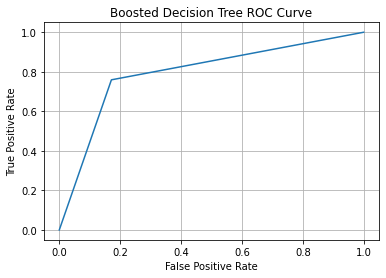

In [33]:
fpr, tpr, _ = metrics.roc_curve(y_test_clf, clf.predict(X_test_clf))
plt.plot(fpr, tpr)
plt.title("Boosted Decision Tree ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(True)

### CLF Tuning

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [45]:
pipe = Pipeline(steps=[('clf', clf)])

In [46]:
n_components = list(range(1,X_train_clf.shape[1]+1,1))

In [47]:
criterion = ['gini', 'entropy']
max_depth = [2, 4, 6, 8, 10, 12]

In [48]:
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X_train_clf, y_train_clf)

NameError: name 'parameters' is not defined

In [49]:
print('Best Criterion:', clf_GS.best_estimator.get_params(['dec_tree__criterion']))


NameError: name 'clf_GS' is not defined

### Creating Random Forest Classification

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
SEED = 1

In [52]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_train, y_train, test_size=0.3, stratify=y_train, random_state=SEED)

In [53]:
rf = RandomForestClassifier(random_state=SEED)

In [54]:
rf.fit(X_train_rf, y_train_rf)

KeyboardInterrupt: 

In [ ]:
y_pred_rf = rf.predict(X_test_rf)

In [ ]:
y_pred_rf

In [ ]:
y_proba_rf = rf.predict_proba(X_test_rf)

In [ ]:
metrics.plot_roc_curve(rf, X_test_clf, y_test_clf)
plt.title("Boosted Decision Tree ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(True)

#### Accuracy

In [ ]:
print("RF test accuracy: %0.20f" % rf.score(X_test_rf, y_test_rf))

#### Random Forest Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

criterion = ['gini', 'entropy']
n_estimators = [5, 10, 50, 100]
max_depth = [5, 10, 50, 100]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'bootstrap': bootstrap,
               'criterion': criterion}

print(random_grid)

In [ ]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train_rf, y_train_rf)

In [ ]:
rf_random.best_params_

### AdaBoost Classification

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [ ]:
SEED = 1

In [ ]:
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(undersampled_X_train, undersampled_y_train, test_size=0.3,
                                                   stratify=undersampled_y_train, random_state=SEED)

In [ ]:
clf_ada = DecisionTreeClassifier(random_state=SEED)

In [ ]:
adb_clf = AdaBoostClassifier(base_estimator=clf_ada)

In [ ]:
adb_clf.fit(X_train_a, y_train_a)

In [ ]:
adb_clf.score(X_train_a, y_train_a)

## Feature Importance

In [ ]:
input_columns_new = ['mbb', 'weight', 'njets', 'nbjets', 'ptbb', 'etabb', 'phibb', 'ebb',
       'dRbb', 'dEtabb', 'dPhibb', 'mj1', 'ptj1', 'etaj1', 'phij1', 'ej1',
       'btagj1', 'qglikelihoodj1', 'mj2', 'ptj2', 'etaj2', 'phij2', 'ej2',
       'btagj2', 'qglikelihoodj2', 'mj3', 'ptj3', 'etaj3', 'phij3', 'ej3',
       'btagj3', 'qglikelihoodj3', 'dR13', 'dEta13', 'dPhi13', 'dR23',
       'dEta23', 'dPhi23', 'mj4', 'ptj4', 'etaj4', 'phij4', 'ej4', 'btagj4',
       'qglikelihoodj4']

X_test = test_df[input_columns_new]

y_test = test_df['label']

In [ ]:
class_1, class_0 = train_df.label.value_counts()
c1 = train_df[train_df['label']==1]
c0 = train_df[train_df['label']==0]
c1_sam = c1.sample(class_0)
undersampled_train = pd.concat([c0,c1_sam], axis=0)
undersampled_train['label'].value_counts()

In [ ]:
feat_importance = clf.tree_.compute_feature_importances(normalize=False)
print("Feature Importance =" + str(feat_importance))

In [ ]:
tree = clf.fit(X_test_clf, y_test_clf)
tree.feature_importances_

In [ ]:
feat_imp = pd.DataFrame(tree.feature_importances_, columns=['feature importance'])
feat_imp

In [ ]:
feat_imp['feature']= input_columns
feat_imp

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.barplot(y="feature", x="feature importance", data=feat_imp)